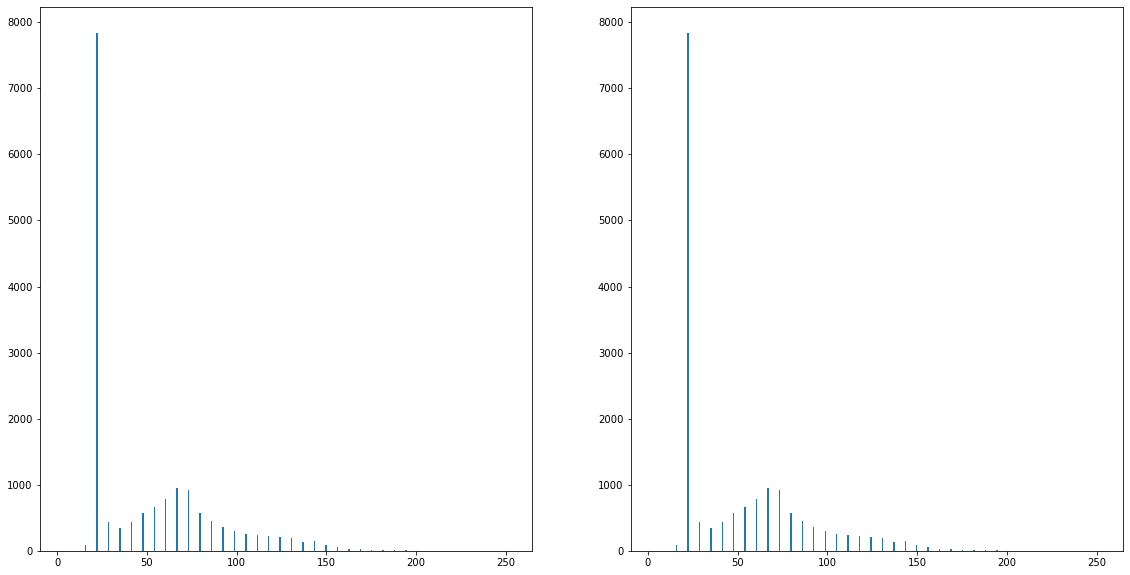

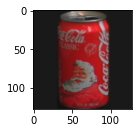

In [121]:
# import packages
import numpy as np
from PIL import Image
from numpy import histogram as hist  # call hist, otherwise np.histogram
import matplotlib.pyplot as plt

import histogram_module
#import dist_module
#import match_module
#import rpc_module



def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray






## gray-value histograms (Question 2.a)

img_color = np.array(Image.open('./model/obj62__0.png'))
img_gray = rgb2gray(img_color.astype('double'))

plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
num_bins_gray = 40
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0, 255))
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1)

plt.subplot(1,3,2)
hist_gray2, bin_gray2 = histogram_module.normalized_hist(img_gray, num_bins_gray)
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_gray2)
plt.show()

plt.subplot(1,3,3)
plt.imshow(img_color)

<BarContainer object of 40 artists>

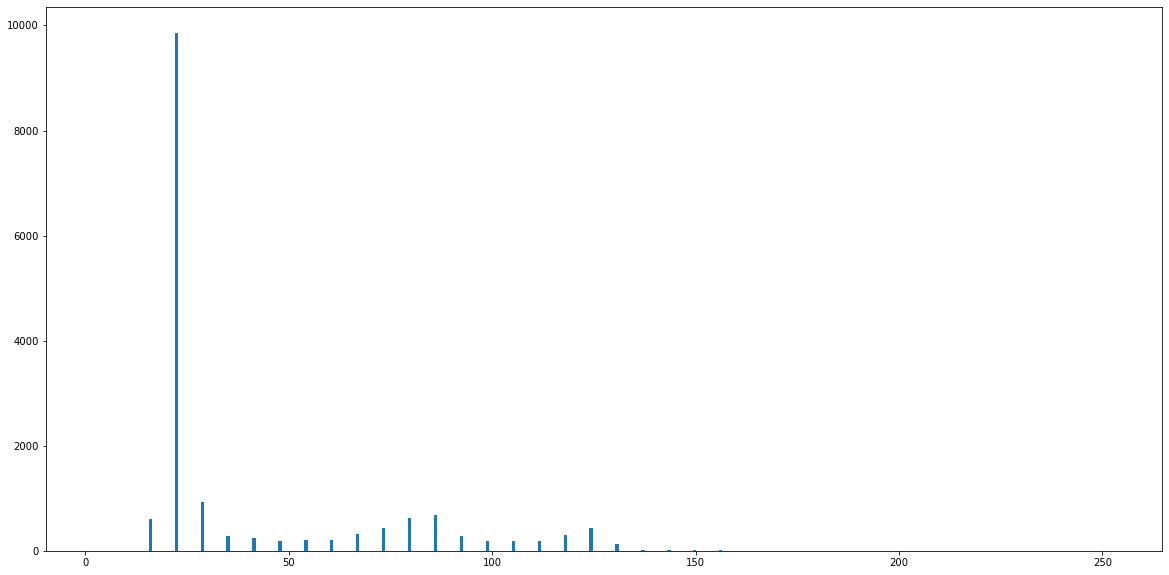

In [3]:
plt.figure(figsize=(20,10))
num_bins_gray = 40
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0, 255))
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1)

In [54]:
vector = img_gray.reshape(img_gray.size)

In [56]:
len(vector)

16384

<BarContainer object of 40 artists>

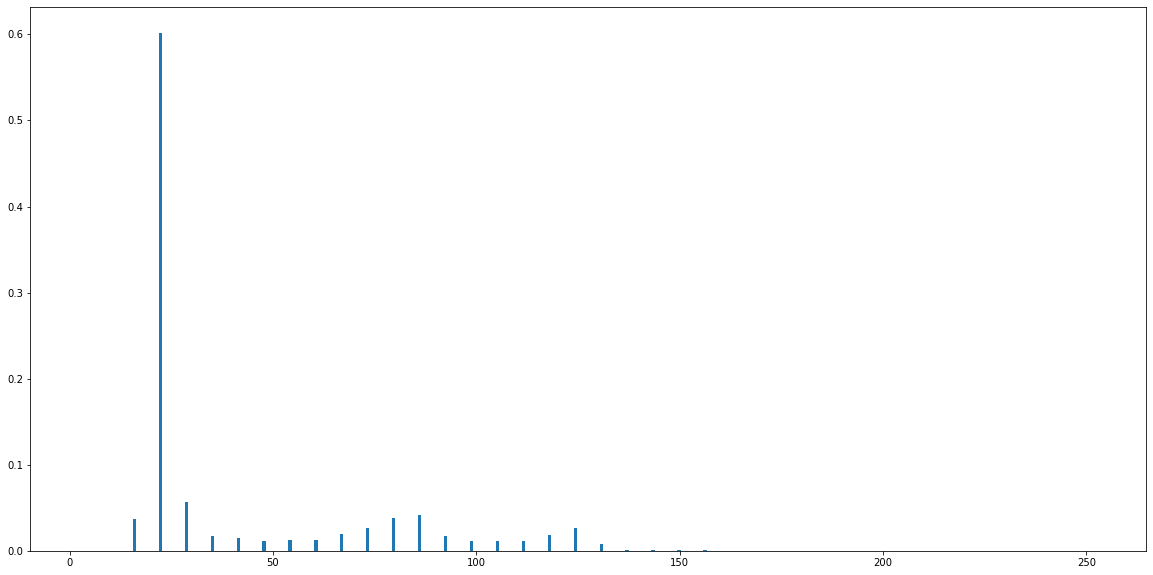

In [17]:
plt.figure(figsize=(20,10))
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_pixel)

In [15]:
def normalized_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'

    img_vector = img_gray.reshape(img_gray.size)

    true_bins = np.arange(0, 255, 255/num_bins)
    dict_pixel = {k: 0 for k in true_bins}
    for el in img_vector:
        for k in dict_pixel:
            if el < k + 6.375 and el >= k:
                dict_pixel[k] += 1

    hists = np.array(list(dict_pixel.values()))
    
    hists = hists/hists.sum()

    bins = np.arange(0, 256, 6.375)
    
    return hists, bins

In [16]:
hist_pixel, bin_gray2 = normalized_hist(img_gray, 40)

In [129]:
vector = img_color.reshape(img_color.shape[0]*img_color_double.shape[1], 3)
true_bins = np.arange(0, 255, 51)
hists = np.zeros((num_bins, num_bins, num_bins))

In [130]:
for i in range(img_color_double.shape[0]*img_color_double.shape[1]):
    
    for j in range(len(vector[i])):
        
        for k, el in enumerate(true_bins):
            
            if vector[i, j] < el + 51 and vector[i, j] >= el:
                
                if j == 0:
                    R = k
                elif j == 1:
                    G = k
                else:
                    B = k
                    
    hists[R, G, B] += 1
    
hists = hists/hists.sum()
hists = hists.reshape(hists.size)

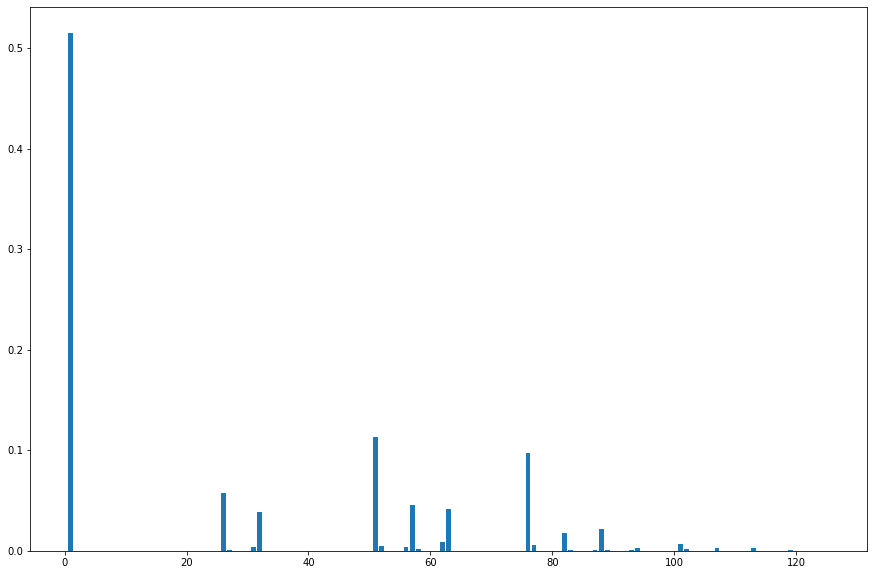

In [131]:
plt.figure(figsize=(15, 10))
plt.bar(np.array(range(1, hists.size+1)),hists)
plt.show()

In [119]:
vector_image= img_color.reshape(img_color.shape[0] * img_color_double.shape[1], 3)
true_bins = np.arange(0, 255, 51)


#Define a 2D histogram  with "num_bins^2" number of entries
hists = np.zeros((num_bins, num_bins))

for i in range(img_color_double.shape[0] * img_color_double.shape[1]):

    for j in range(len(vector_image[i])):

        for k, el in enumerate(true_bins):

            if vector_image[i, j] < el + 51 and vector_image[i, j] >= el:

                if j == 0:
                    R = k
                elif j == 1:
                    G = k

    hists[R, G] += 1

hists = hists / hists.sum()

#Return the histogram as a 1D vector
hists = hists.reshape(hists.size)

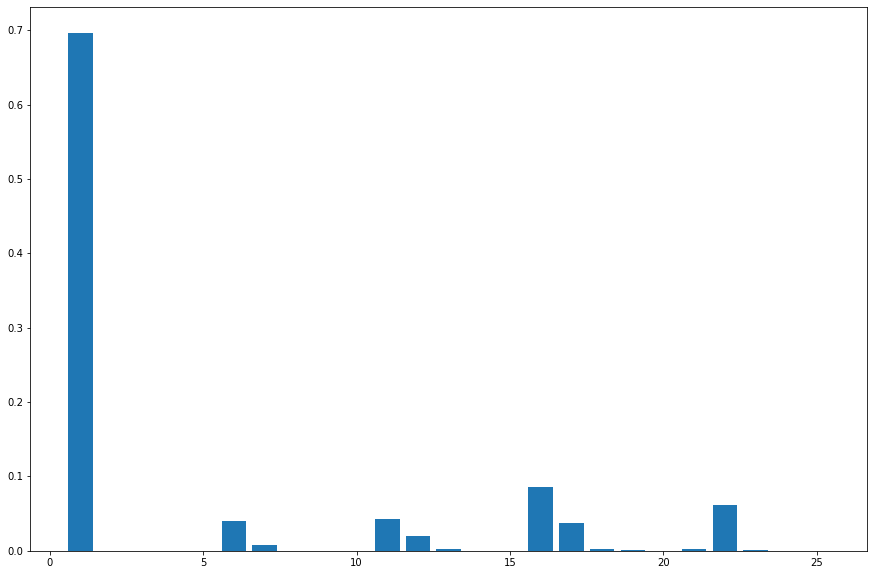

In [120]:
plt.figure(figsize=(15, 10))
plt.bar(np.array(range(1, hists.size+1)),hists)
plt.show()